In [1]:
import os
os.chdir('..')

In [2]:
import json
import uuid

from uuid import UUID
from datetime import date, datetime

import numpy as np
import datajoint as dj
# from pipeline import lab, experiment, ephys, ccf, psth, publication
from pipeline import lab, experiment, ephys, tracking, ccf, publication

Connecting root@127.0.0.1:3306


In [ ]:
erd = dj.ERD(lab) + dj.ERD(publication) + dj.ERD(experiment) + dj.ERD(ephys) + dj.ERD(psth) + dj.ERD(ccf)

In [ ]:
erd

## New schema design Trial ERD

In [19]:
behav_erd = (dj.ERD(experiment.SessionTrial) + 1
             - dj.ERD(publication)
             - dj.ERD(ephys) 
             - dj.ERD(experiment.PassivePhotostimTrial)
             + dj.ERD(experiment.BrainLocation)
             + (dj.ERD(experiment.PhotostimTrial)+1-1) 
             + (dj.ERD(experiment.BehaviorTrial)+1-1)) - 1

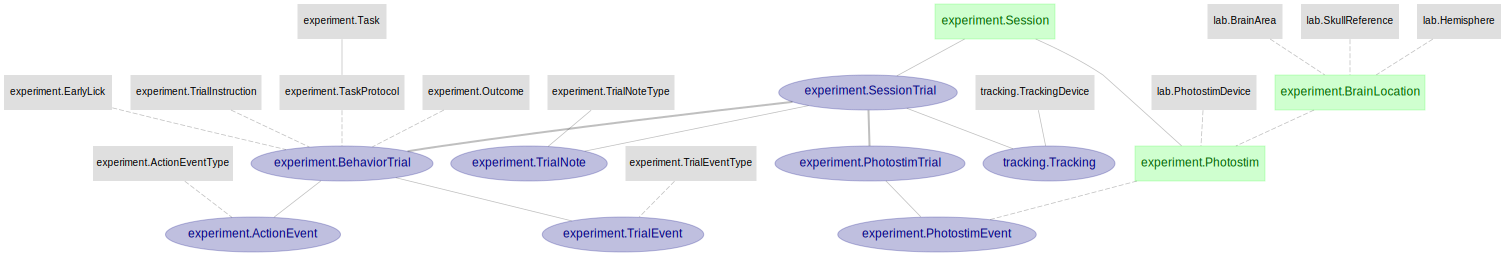

In [20]:
behav_erd

In [25]:
behav_erd.save('images/canonical_behavior.png')

In [15]:
ephys_erd = (dj.ERD(ephys.ProbeInsertion) + 1 
             + (dj.ERD(ephys.LFP) + 1)
             - dj.ERD(ephys.LabeledTrack)
             - dj.ERD(publication)
             - dj.ERD(ephys.ElectrodeCCFPosition) + dj.ERD(experiment.Session)) - 1

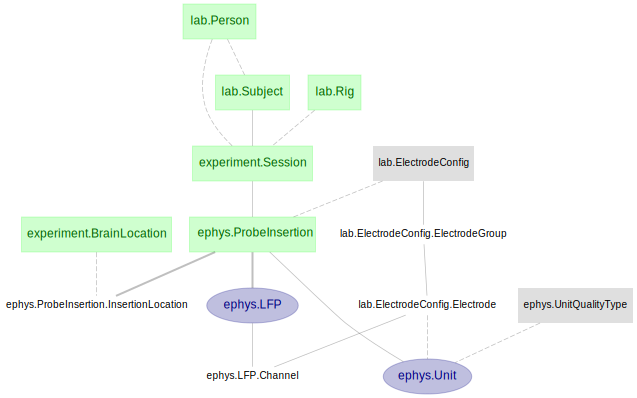

In [16]:
ephys_erd

In [26]:
ephys_erd.save('images/canonical_ephys.png')

# Canonical Pipeline for extracellular ephys and behavioral
### Need more unified vocabulary

In [23]:
cannonical_erd = (ephys_erd
                  + behav_erd
                  - dj.ERD(lab.Rig)
                  - dj.ERD(experiment.PassivePhotostimTrial) 
                  + dj.ERD(ephys.TrialSpikes)
                  + dj.ERD(lab.Probe))

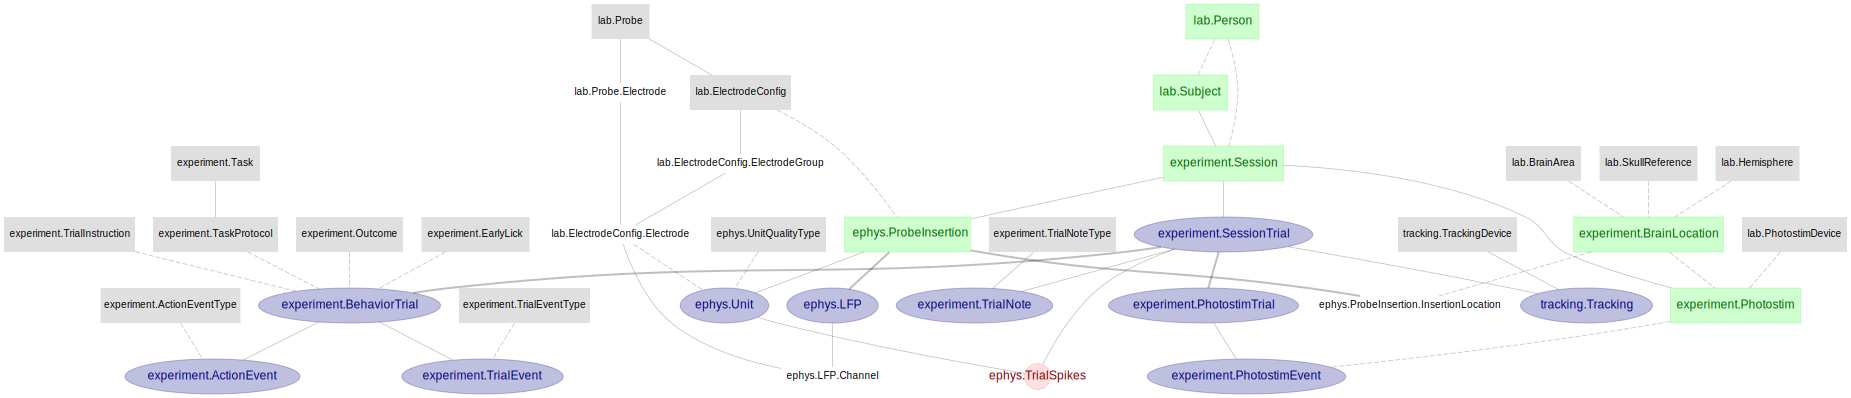

In [24]:
cannonical_erd

In [27]:
cannonical_erd.save('images/canonical_ephys_behavior.png')